In [388]:
import numpy as np
import scipy.io as sp
from sklearn.model_selection import train_test_split 
from numpy import concatenate
from sklearn.semi_supervised import LabelPropagation
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, roc_auc_score,precision_score
# evaluate label propagation on the semi-supervised learning dataset



dataSet = sp.loadmat('C:\\Users\\junda\\OneDrive\\Bureau\\breastw.mat')
X = dataSet['X']
y = dataSet['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)
X_train, X_unl, y_train, y_unl = train_test_split(X_train, y_train, test_size=0.7, stratify=y_train)

y_train = np.ravel(y_train)
X_train_mixed = concatenate((X_train, X_unl))
y_SVC_test = y_unl

y_unl = [-1 for i in range(len(y_unl))]
y_unl = np.ravel(y_unl)





In [389]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_unl = model.predict(X_unl)
print (classification_report(y_SVC_test,y_unl))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       249
           1       0.95      0.95      0.95       134

    accuracy                           0.97       383
   macro avg       0.96      0.96      0.96       383
weighted avg       0.97      0.97      0.97       383



In [390]:

y_train_mixed = concatenate((y_unl,y_train))
gmm = GaussianMixture(n_components=2, covariance_type ='full', random_state = None, max_iter=100)
gmm.fit(X_train_mixed,y_train_mixed)
y_pred = gmm.predict(X_test)
if precision_score(y_test,y_pred)< 0.15:
    
        y_pred = np.array([0 if label == 1 else 1 for label in y_pred])


In [391]:

print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        89
           1       0.81      1.00      0.90        48

    accuracy                           0.92       137
   macro avg       0.91      0.94      0.92       137
weighted avg       0.93      0.92      0.92       137

0.9382022471910113


In [392]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [393]:
X = dataSet['X']
y = dataSet['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

gmm = GaussianMixture(n_components=2, covariance_type ='full', random_state = None, max_iter=100)
gmm.fit(X_train,y_train)
y_pred1 = gmm.predict(X_test)
probas = gmm.predict_proba(X_test)
if precision_score(y_test,y_pred1)< 0.15:
    
        y_pred1 = np.array([0 if label == 1 else 1 for label in y_pred1])
print(classification_report(y_test,y_pred1)) 

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        89
           1       0.77      1.00      0.87        48

    accuracy                           0.90       137
   macro avg       0.89      0.92      0.89       137
weighted avg       0.92      0.90      0.90       137



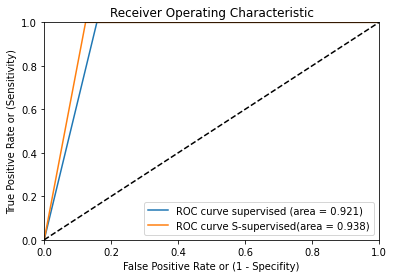

In [394]:

fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,y_pred1)
roc_auc1 =metrics.auc (fpr1,tpr1)
plt.plot(fpr1, tpr1, label='ROC curve supervised (area = %0.3f)' % roc_auc1)
plt.plot(fpr, tpr, label='ROC curve S-supervised(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")